<a href="https://colab.research.google.com/github/NeuralDataMind/Tensorflow/blob/main/Lego_star_wars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ihelon/lego-minifigures-classification")

# print("Path to dataset files:", path)

100%|██████████| 28.8M/28.8M [00:00<00:00, 113MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ihelon/lego-minifigures-classification/versions/30


In [ ]:
# import os
# import shutil

# dataset_path = "/root/.cache/kagglehub/datasets/ihelon/lego-minifigures-classification/versions/30"
# destination_path = "/content/lego-minifigures-classification"

# # Create the destination directory if it doesn't exist
# os.makedirs(destination_path, exist_ok=True)

# # Move the contents of the downloaded dataset to the destination
# for item in os.listdir(dataset_path):
#     s = os.path.join(dataset_path, item)
#     d = os.path.join(destination_path, item)
#     if os.path.isdir(s):
#         shutil.move(s, d)
#     else:
#         shutil.move(s, d)

# print(f"Dataset moved to: {destination_path}")

In [ ]:
# Original_DIR = '/content/lego-minifigures-classification/star-wars'

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import shutil
# import os

# source_path = "/content/lego-minifigures-classification/star-wars"
# destination_path = "/content/drive/MyDrive/star-wars_copy"

# # Create the destination directory if it doesn't exist
# os.makedirs(destination_path, exist_ok=True)

# # Copy the contents of the source directory to the destination
# shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

# print(f"Directory copied to: {destination_path}")

Directory copied to: /content/drive/MyDrive/star-wars_copy


In [2]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
BASE_DIR = '/content/drive/MyDrive/star-wars_copy/'
names = ['YODA', 'LUKE SKYWALKER', 'R2-D2', 'MACE WINDU', 'GENERAL GRIEVOUS']

tf.random.set_seed(1)

In [13]:
# if not os.path.isdir(BASE_DIR + 'train/'):
#   for name in names:
#     os.makedirs(BASE_DIR + 'train/' + name)
#     os.makedirs(BASE_DIR + 'val/' + name)
#     os.makedirs(BASE_DIR + 'test/' + name)

In [4]:
# Total number of classes in the dataset
orig_folders = ['0001/', '0002/', '0003/', '0004/', '0005/']

for  folder_idx, folder in enumerate(orig_folders):
  files = os.listdir(BASE_DIR + folder)
  number_of_images = len([name for name in files])

  n_train = int((number_of_images * 0.6) + 0.5)
  n_valid = int((number_of_images * 0.25) + 0.5)
  n_test = number_of_images - n_train - n_valid

  print(number_of_images, n_train, n_valid, n_test)

  for idx, file in enumerate(files):
    file_name = BASE_DIR + folder + file

    if idx < n_train:
      shutil.copy(file_name, BASE_DIR + 'train/' + names[folder_idx])
    elif idx < n_train + n_valid:
      shutil.copy(file_name, BASE_DIR + 'val/' + names[folder_idx])
    else:
      shutil.copy(file_name, BASE_DIR + 'test/' + names[folder_idx])

12 7 3 2
12 7 3 2
12 7 3 2
13 8 3 2
14 8 4 2


In [25]:
# Generate batches of tensor image data with real-time data augmentation.

# preprocessing function
# rescale = 1./255 -> [0, 1]

train_gen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_batches = train_gen.flow_from_directory(
    '/content/drive/MyDrive/star-wars_copy/train',
    target_size = (256, 256),
    class_mode = 'sparse',
    batch_size = 4,
    shuffle = True,
    color_mode = 'rgb',
    classes = names
)

val_batches = valid_gen.flow_from_directory(
    '/content/drive/MyDrive/star-wars_copy/val',
    target_size = (256, 256),
    class_mode = 'sparse',
    batch_size = 4,
    shuffle = True,
    color_mode = 'rgb',
    classes = names
)

test_batches = test_gen.flow_from_directory(
    '/content/drive/MyDrive/star-wars_copy/test',
    target_size = (256, 256),
    class_mode = 'sparse',
    batch_size = 4,
    shuffle = False,
    color_mode = 'rgb',
    classes = names
)

Found 52 images belonging to 5 classes.
Found 28 images belonging to 5 classes.
Found 19 images belonging to 5 classes.


In [26]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])

test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(4, 256, 256, 3)
[2. 4. 1. 2.]
(4, 256, 256, 3)
[0. 0. 0. 0.]


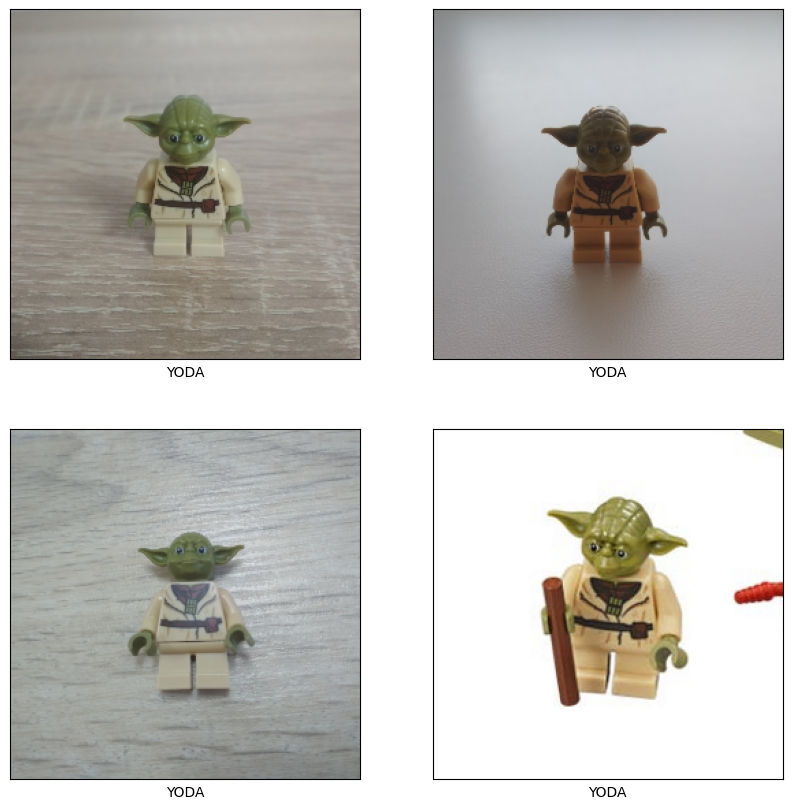

In [27]:
def show(batch, pred_labels=None):
    images, labels = batch

    plt.figure(figsize=(10, 10))
    for i in range(min(4, len(images))):
        plt.subplot(2, 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # Convert Tensor to NumPy if needed
        img = images[i].numpy() if hasattr(images[i], "numpy") else images[i]
        plt.imshow(img)  # RGB image: no cmap needed

        label = names[int(labels[i])]
        if pred_labels is not None:
            pred = pred_labels[i].numpy() if hasattr(pred_labels[i], "numpy") else pred_labels[i]
            label += " / Pred: " + names[int(pred)]
        plt.xlabel(label)

    plt.show()
show(test_batch)

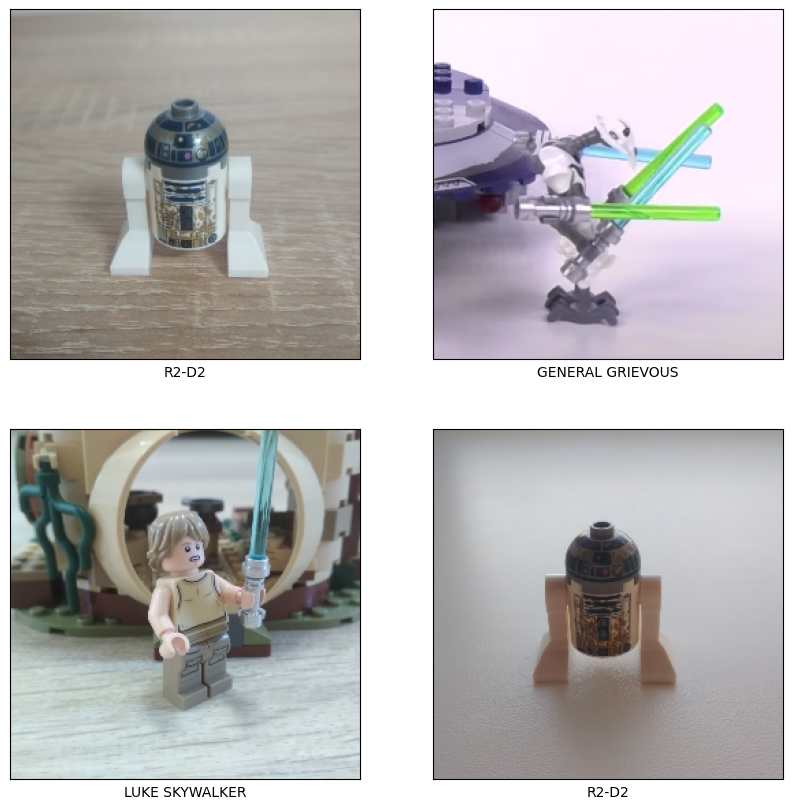

In [28]:
show(train_batch)

In [29]:
model = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 2, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 64)   │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 254016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    16,257,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,266,565 (62.05 MB)

 Trainable params: 16,266,565 (62.05 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
loss =  keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])

In [31]:
history = model.fit(train_batches, validation_data = val_batches, epochs = 30, verbose = 1)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 685ms/step - accuracy: 0.1343 - loss: 7.7337 - val_accuracy: 0.2143 - val_loss: 1.6959
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 629ms/step - accuracy: 0.2836 - loss: 1.5332 - val_accuracy: 0.3571 - val_loss: 1.5064
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 494ms/step - accuracy: 0.3078 - loss: 1.5808 - val_accuracy: 0.3214 - val_loss: 1.4091
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 638ms/step - accuracy: 0.3431 - loss: 1.4035 - val_accuracy: 0.4286 - val_loss: 1.0984
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 543ms/step - accuracy: 0.7161 - loss: 0.9142 - val_accuracy: 0.6786 - val_loss: 0.7940
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 622ms/step - accuracy: 0.7602 - loss: 0.6973 - val_accuracy: 0.8929 - val_loss: 0.5338
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 569ms/step - accuracy: 0.9686 - loss: 0.4819 - val_accuracy: 0.8214 - val_loss: 0.4814
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 672ms/step - accuracy: 0.9865 - loss: 0.1718 - val_accuracy: 0

In [35]:
model.save(BASE_DIR + 'lego_model.keras')
print(f"Mode saved to: {BASE_DIR + 'lego_model.keras'}")

Mode saved to: /content/drive/MyDrive/star-wars_copy/lego_model.keras


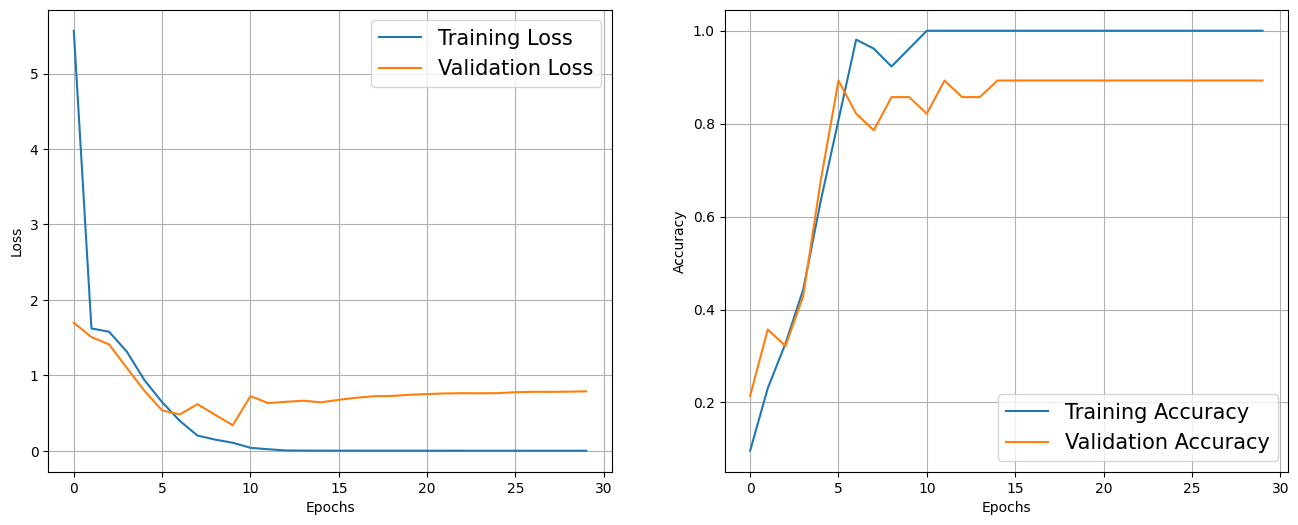

In [36]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 15)

plt.show()

In [39]:
model.evaluate(test_batches)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 1.0000 - loss: 0.0179


[0.01601705513894558, 1.0]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
[0. 0. 0. 0.]
[0 0 0 0]


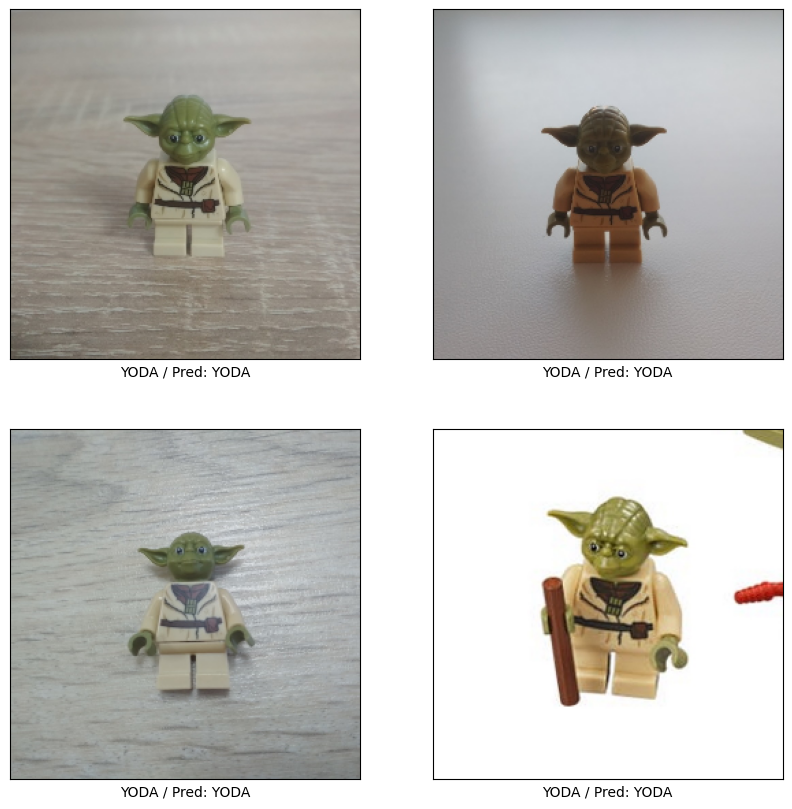

In [38]:
predictions = model.predict(test_batches)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

show(test_batches[0], labels[0: 4])